In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train =  pd.read_csv('C:/Users/91707/OneDrive - LNMIIT/car_price/univ_AI/Training Data.csv')

In [3]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<AxesSubplot:>

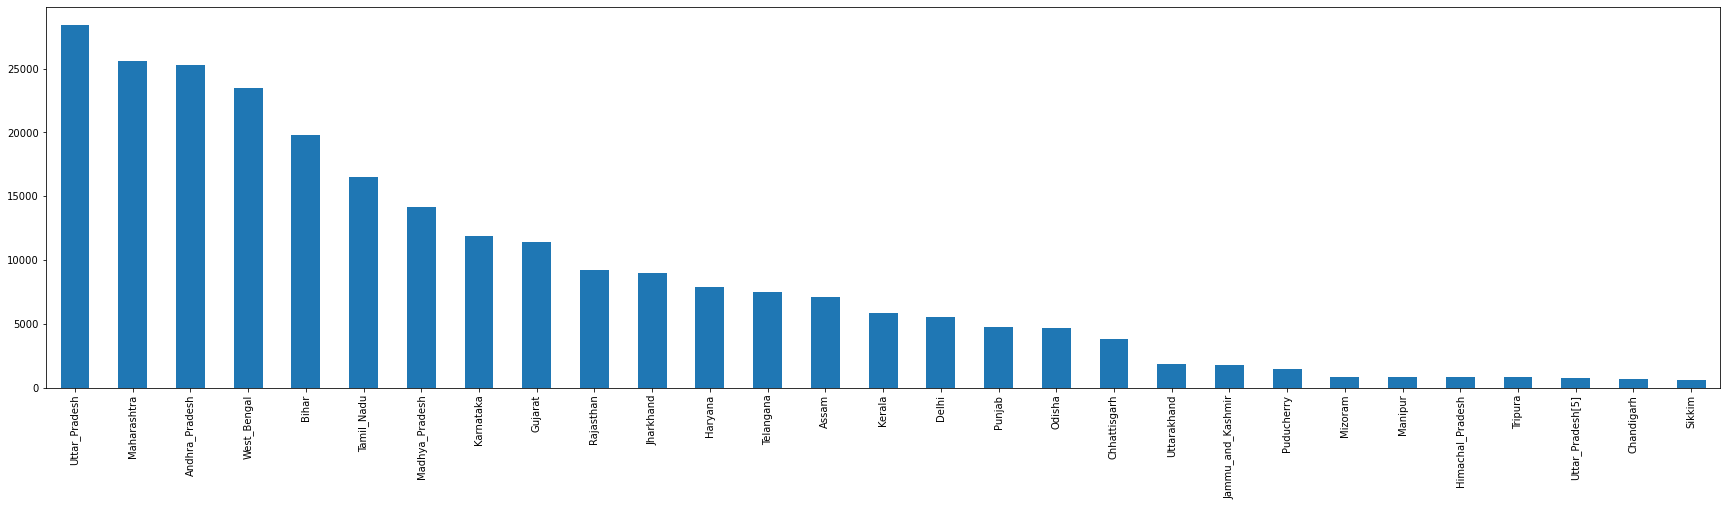

In [16]:
train['state'].value_counts().plot.bar(figsize = (30,7))

<AxesSubplot:>

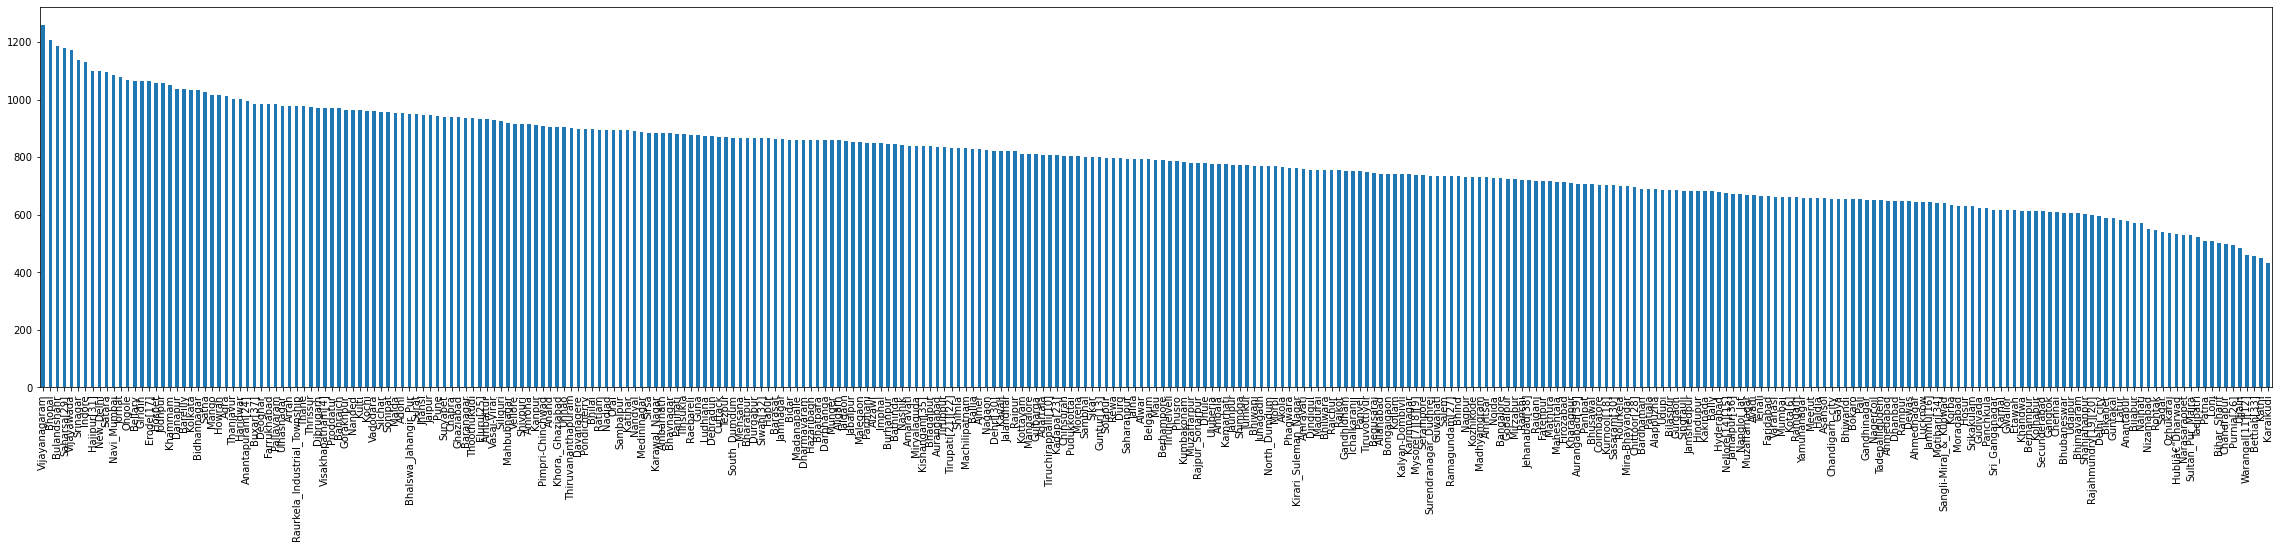

In [18]:
train['city'].value_counts().plot.bar(figsize = (40,7))

<AxesSubplot:>

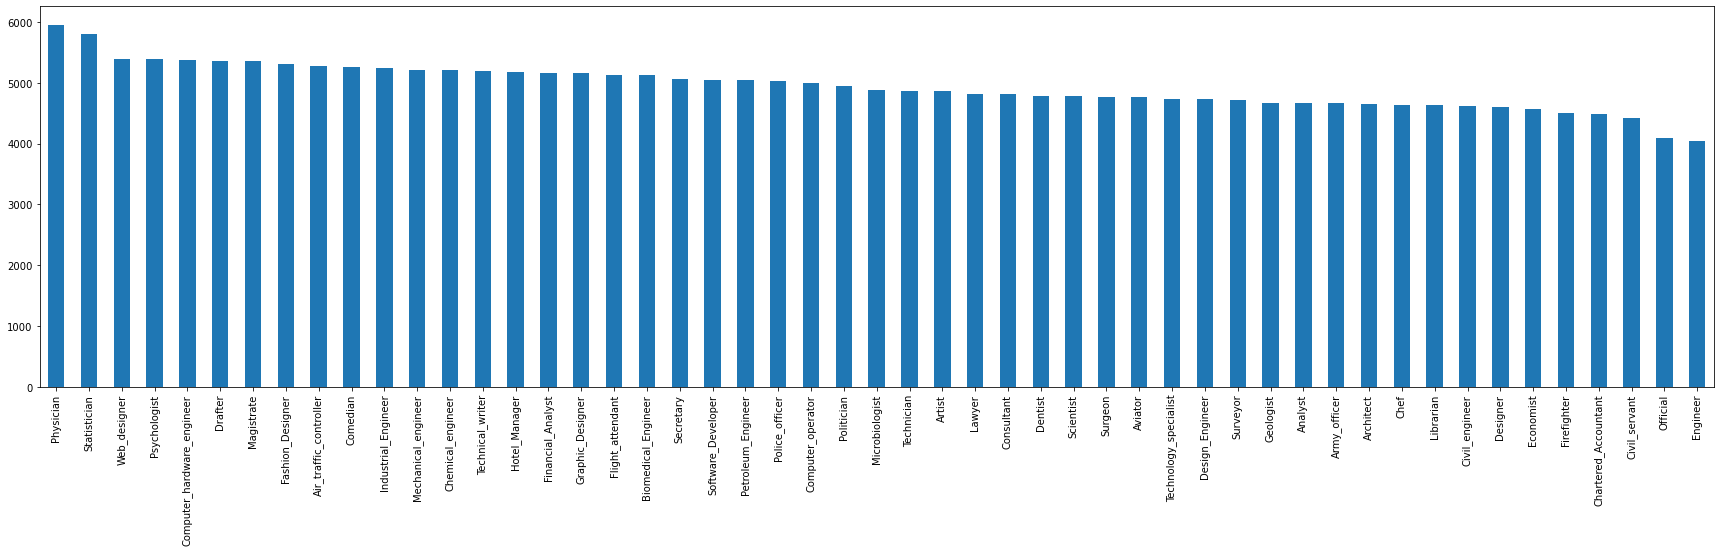

In [14]:
train['profession'].value_counts().plot.bar(figsize = (30,7))

C:\Users\91707\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


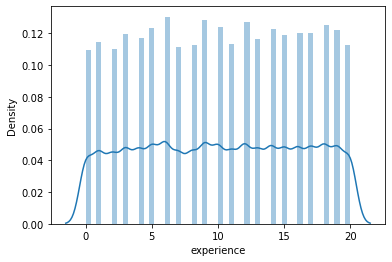

In [10]:
sns.distplot(train.experience)
plt.show()

C:\Users\91707\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


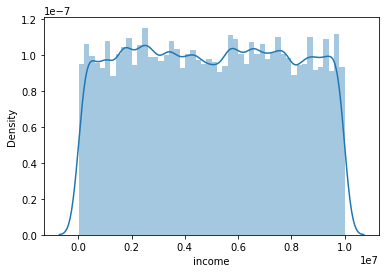

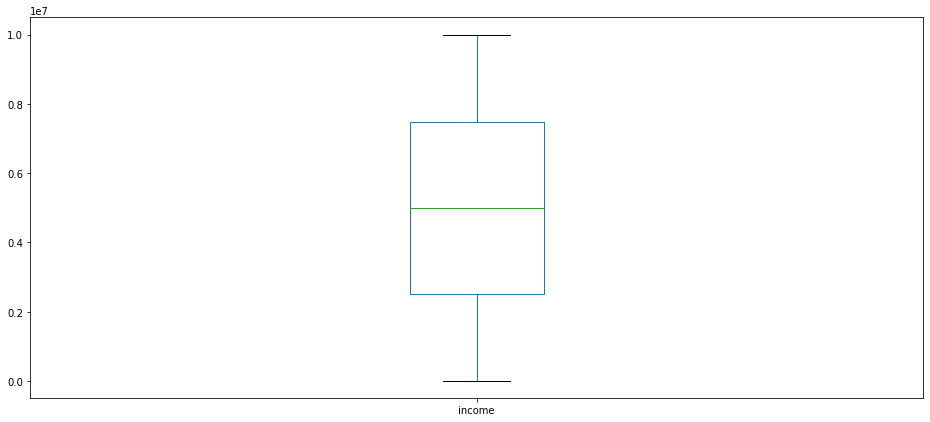

In [5]:
sns.distplot(train.income)
plt.show()
train.income.plot.box(figsize = (16,7))
plt.show()

<AxesSubplot:>

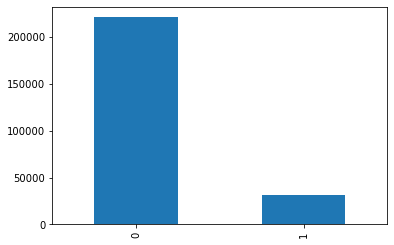

In [7]:
train['risk_flag'].value_counts().plot.bar()

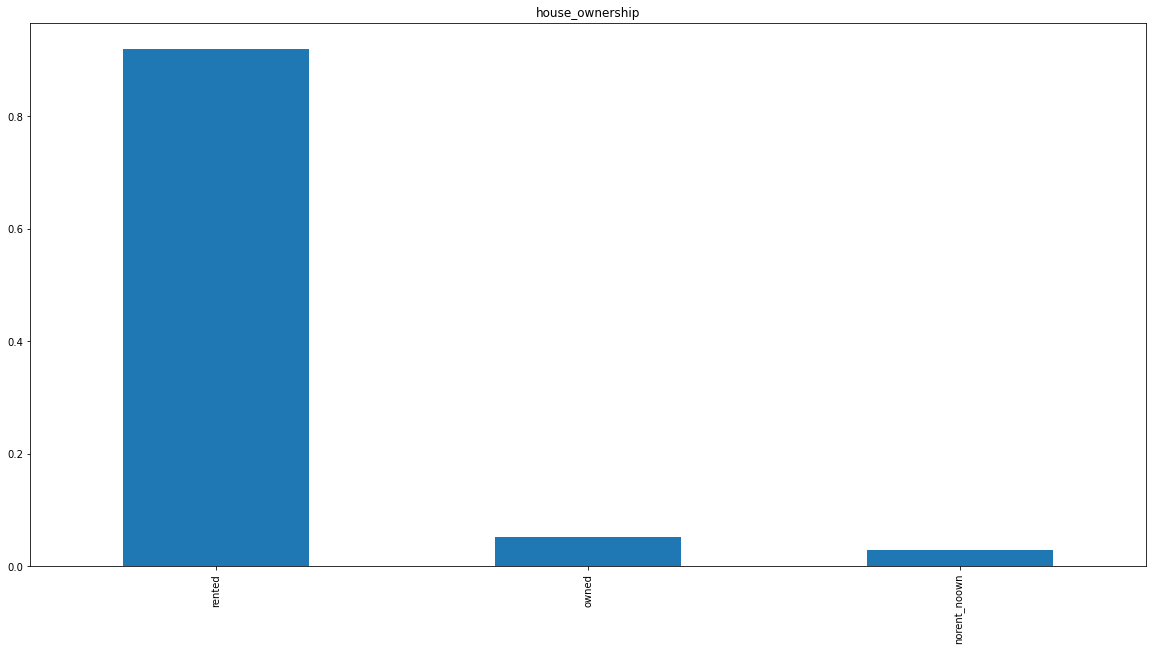

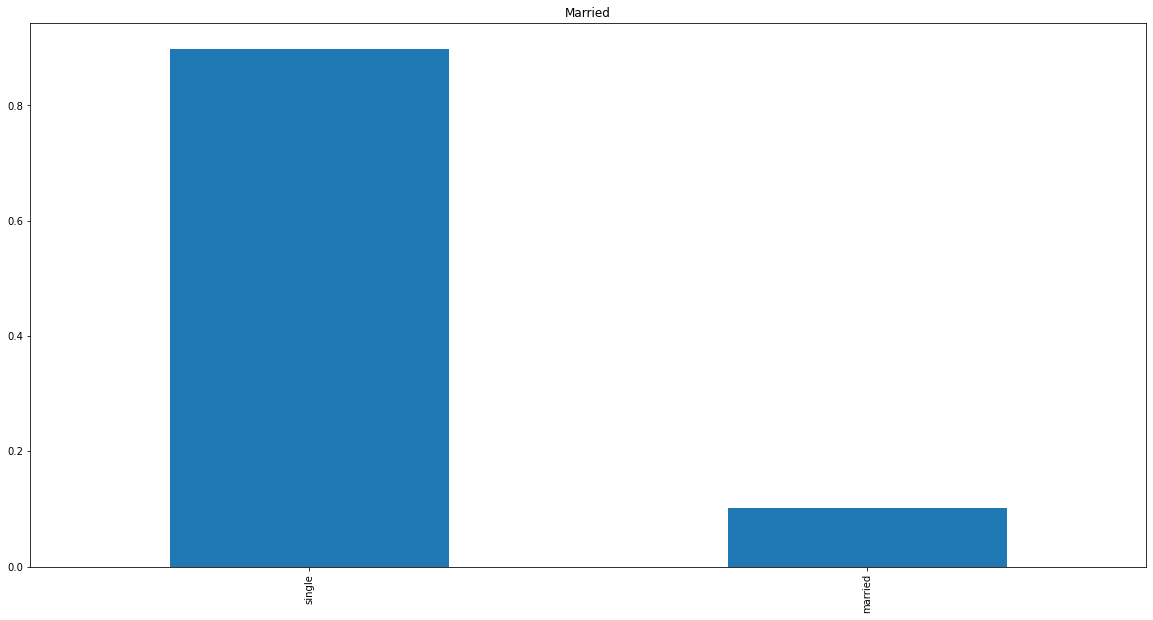

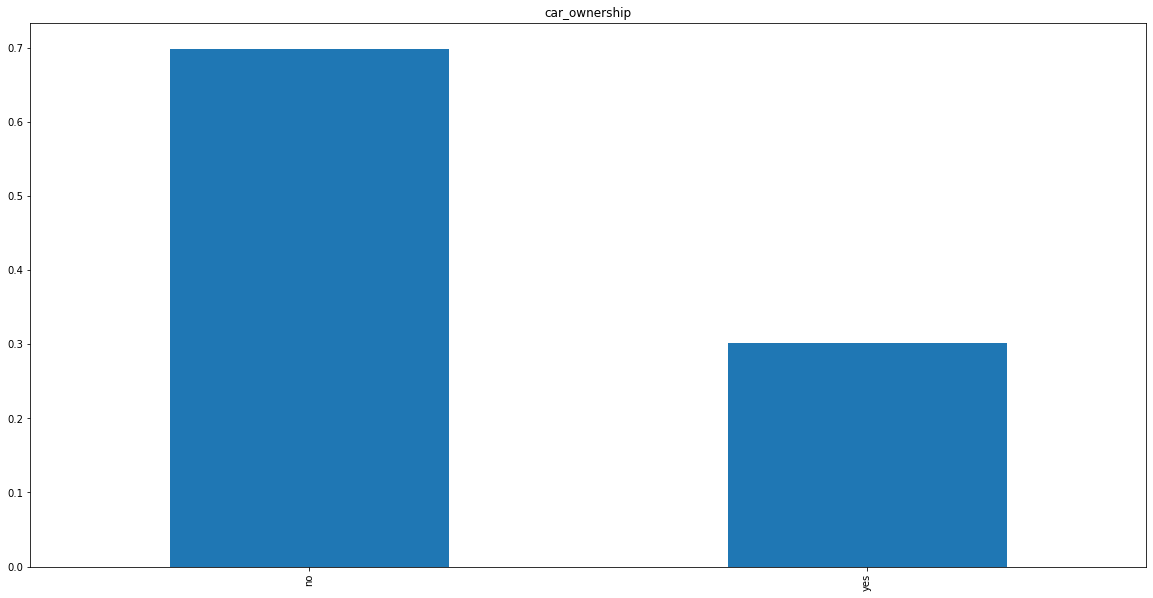

In [9]:
train['house_ownership'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "house_ownership")
plt.show()
train['married'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Married")
plt.show()
train['car_ownership'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "car_ownership")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
train_categ_2 = train.drop(['city','profession'],axis = 1)
train_categ_2 = train.copy()

train_categ_2 = pd.get_dummies(train_categ_2)
train_categ_2
train_categ_2_y = train_categ_2['risk_flag']
train_categ_2_x = train_categ_2.drop('risk_flag',axis =1)
train_categ_2_x,test_categ_2_x,train_categ_2_y,test_categ_2_y = train_test_split(train_categ_2_x, train_categ_2_y, test_size=0.33, random_state=42)
random_classifier_model_categ2 = RandomForestClassifier()
#random_classifier_model_categ2.fit(train_categ_2_x,train_categ_2_y)
#roc_auc_score(test_categ_2_y, random_classifier_model_categ2.predict_proba(test_categ_2_x)[:, 1])

In [14]:
#building the model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from __future__ import absolute_import,division,print_function
import os
import tensorflow as tf

ann_model = Sequential()

ann_model.add(Dense(50, kernel_initializer = 'uniform',activation='relu',input_dim = 42))

ann_model.add(Dense(25, kernel_initializer = 'uniform',activation='relu'))

ann_model.add(Dense(50, kernel_initializer = 'uniform',activation='relu'))

ann_model.add(Dense(1, kernel_initializer = 'uniform'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#close_path = 'C:/Users/91707/OneDrive - LNMIIT/car_price/model.ckpt'

#close_dir = os.path.dirname(close_path)

#cp_callback = tf.keras.callbacks.ModelCheckpoint(close_path,save_weights_only=True,verbose= 1)

model_history=ann_model.fit(train_categ_2_x,train_categ_2_y,validation_split=0.20, batch_size = 10, epochs = 20)



Epoch 1/20
13508/13508 [==============================] - 16s 1ms/step - loss: 1.9017 - accuracy: 0.8767 - val_loss: 1.9099 - val_accuracy: 0.8762
Epoch 2/20
13508/13508 [==============================] - 24s 2ms/step - loss: 1.9017 - accuracy: 0.8767 - val_loss: 1.9099 - val_accuracy: 0.8762
Epoch 3/20
 2319/13508 [====>.........................] - ETA: 28s - loss: 1.9090 - accuracy: 0.8762

KeyboardInterrupt: 

In [9]:
import re

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
xgb_train_x = train_categ_2_x.copy()
xgb_train_x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in xgb_train_x.columns.values]
# fit xgmodel no training data

#xgbmodel = xgboost.XGBClassifier(n_estimators=100)
#xgbmodel.fit(xgb_train_x,train_categ_2_y)

In [8]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [  15,20,22,24,27,30,25,42],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(xgb_train_x,train_categ_2_y)
timer(start_time)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [33]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=24,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 24,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [35]:
import math

In [57]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=24,
              min_child_weight=3, missing=math.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier.fit(xgb_train_x,train_categ_2_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=24,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [65]:
xgb_test_x = test_categ_2_x.copy()
xgb_test_x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in xgb_test_x.columns.values]
sol = classifier.predict_proba(xgb_test_x)[:, 1]
ans = []
for i in range(len(sol)):
    if sol[i] <= 0.5:
        ans.append(0)
    else:
        ans.append(1)
roc_auc_score(test_categ_2_y, ans)

0.8330817131083891

In [ ]:
sol = 

In [63]:
test = pd.read_csv('C:/Users/91707/OneDrive - LNMIIT/car_price/univ_AI/Test Data.csv')
test_categ_2 = test.drop(['city','profession'],axis = 1)
test_categ_2 = pd.get_dummies(test_categ_2)
test_categ_2
xgb_test_x = test_categ_2.copy()

xgb_test_x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in xgb_test_x.columns.values]
#print(xgb_test_x)

sol = classifier.predict_proba(xgb_test_x) 
print(sol)
'''sol = classifier.predict_proba(xgb_test_x)
ans = []
for i in range(len(sol)):
    if sol[i] <= 0.5:
        ans.append([i+1,0])
    else:
        ans.append([i+1,1])
df = pd.DataFrame(ans, columns = ['id', 'risk_flag'])
df.to_csv('sub_file.csv')'''

[[0.9830699  0.0169301 ]
 [0.95410895 0.04589102]
 [0.93213737 0.06786262]
 ...
 [0.9869001  0.01309988]
 [0.996479   0.00352105]
 [0.9317554  0.06824455]]


"sol = classifier.predict_proba(xgb_test_x)\nans = []\nfor i in range(len(sol)):\n    if sol[i] <= 0.5:\n        ans.append([i+1,0])\n    else:\n        ans.append([i+1,1])\ndf = pd.DataFrame(ans, columns = ['id', 'risk_flag'])\ndf.to_csv('sub_file.csv')"

In [66]:
test

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14
